In [3]:
import pandas as pd
import pandas as pd 
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
import numpy as np


In [43]:
key="肺栓塞"
key="主动脉夹层"
# key="急性冠脉综合征"

In [44]:
predict=pd.read_csv("autox_"+key+"_oneclick.csv")

In [45]:
test=pd.read_csv(key+"/test.csv")

In [46]:
predict["target"].max()

0.5460526922521659

In [47]:
len(predict[predict["target"]>=0.1])

90

In [48]:
predict["pred"]=predict.apply( lambda x:1 if x["target"]>=0.1 else 0,axis=1 )

In [49]:
predict["pred"].value_counts()

0    1482
1      90
Name: pred, dtype: int64

In [50]:
y_test=test["target"]
y_pred_gini=predict["target"]

0.9871675769485989


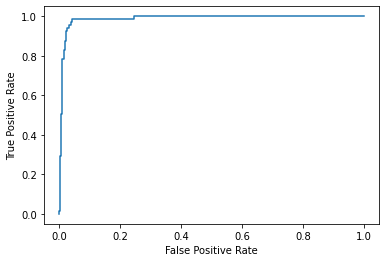

In [51]:
# print(classification_report(y_test, y_pred_gini))
fpr, tpr, _ = roc_curve(y_test, y_pred_gini)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_score=roc_auc_score(y_test, y_pred_gini)
print(roc_score)

In [52]:
false_pos_rate, true_pos_rate, proba = roc_curve(y_test, y_pred_gini)

In [53]:
optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred_gini]

In [54]:
 print(classification_report(y_test, roc_predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1507
           1       0.51      0.98      0.67        65

    accuracy                           0.96      1572
   macro avg       0.76      0.97      0.83      1572
weighted avg       0.98      0.96      0.97      1572



In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gini, pos_label=1)



In [56]:
thresholds

array([1.54605269, 0.54605269, 0.54303236, 0.54141318, 0.52489084,
       0.50896862, 0.45666375, 0.45642209, 0.43079785, 0.42508092,
       0.40488168, 0.38799365, 0.38651983, 0.38347423, 0.37350282,
       0.36900584, 0.36140702, 0.35512289, 0.35147936, 0.34279784,
       0.32401001, 0.32260969, 0.30632016, 0.30559209, 0.30510968,
       0.30300447, 0.29231931, 0.29159394, 0.23584463, 0.23038174,
       0.19629626, 0.16848009, 0.15577378, 0.1552615 , 0.15257261,
       0.1272956 , 0.1109826 , 0.1083997 , 0.10573067, 0.09930569,
       0.09839425, 0.09345856, 0.09090132, 0.08853245, 0.08718293,
       0.05030378, 0.04863988, 0.04190941, 0.04149588, 0.04093917,
       0.04077697, 0.01368716, 0.01359207, 0.00895647, 0.00895644,
       0.0089553 ])

In [18]:
pip install matplotlib

Looking in indexes: http://pypi.douban.com/simple
Note: you may need to restart the kernel to use updated packages.
